# Details

**Name**:          Amulya Thanigundala <br>
**Uplevel email**: amulya.t@gmail.com <br>
**Project**:       Spoiler Shield, Uncover the Thrill, Shield the Surprise

# Objective

The core objective of this project is to use Natural Language Processing (NLP) techniques, specifically deep learning models, to address the challenge of identifying spoilers in IMDb reviews. The task at hand is a binary classification problem: given a review, the model needs to determine whether it contains spoilers or not. This involves understanding the contextual nuances and language intricacies that signify potential plot revelations.



#Installing libraries

In [ ]:
!pip install torchtext==0.6 torch==1.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.17.1
    Uninstalling torchtext-0.17.1:
      Successfully uninstalled torchtext-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
to

In [ ]:
pip install transformers accelerator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install wordcloud

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 10.2 MB/s eta 0:00:00


# Importing libraries

In [ ]:
import os
import gdown
import zipfile

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers import Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from transformers import AdamW
import numpy as np

from datasets import Dataset

from accelerate import Accelerator
from wordcloud import WordCloud

import torch.nn as nn
import torch.optim as optim
from torchtext.data import Field, TabularDataset, BucketIterator

import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import torchtext
print(torchtext.__version__)

0.6.0


# Loading the data

In [ ]:
zip_url = "https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z"

dataset_path = os.path.join("./dataset", "imdb_spoiler")
zip_file_path = os.path.join(dataset_path, "imdb_spoiler_dataset.zip")

if not os.path.exists(dataset_path):
   os.makedirs(dataset_path)

if not os.path.exists(zip_file_path):
   gdown.download(zip_url, zip_file_path, quiet=False)

with zipfile.ZipFile(zip_file_path ,"r") as zip_ref:
   zip_ref.extractall(dataset_path)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z
From (redirected): https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z&confirm=t&uuid=f662dc3f-e3c8-42a3-842b-6a5ec0d717bf
To: /content/dataset/imdb_spoiler/imdb_spoiler_dataset.zip
100%|██████████| 348M/348M [00:03<00:00, 98.8MB/s]


In [ ]:
print("Zip file path:",zip_file_path )

Zip file path: ./dataset/imdb_spoiler/imdb_spoiler_dataset.zip


In [ ]:
extracted_files = os.listdir(dataset_path)
print("Extracted files: ", extracted_files)

Extracted files:  ['IMDB_reviews.json', 'IMDB_movie_details.json', 'imdb_spoiler_dataset.zip']


In [ ]:
movie_details_fpath = os.path.join(dataset_path,'IMDB_movie_details.json' )
imdb_md_df = pd.read_json(movie_details_fpath, lines = True)

In [ ]:
imdb_md_df.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
movie_reviews_fpath = os.path.join(dataset_path,'IMDB_reviews.json' )
imdb_mr_df = pd.read_json(movie_reviews_fpath, lines = True)

In [ ]:
imdb_mr_df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


# Exploratory Data Analysis(EDA)

##Understanding the data

In [ ]:
print("Shape of the movie details dataframe: ", imdb_md_df.shape)
print("Shape of the moview reviews dataframe: ", imdb_mr_df.shape)


Shape of the movie details dataframe:  (1572, 7)
Shape of the moview reviews dataframe:  (573913, 7)


In [ ]:
# Movie details dataframe
print("\n Movie Details Dataframe:")
print(imdb_md_df.info())

# Movie reviews dataframe
print("\n Movie Reviews Dataframe:")
print(imdb_mr_df.info())



 Movie Details Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB
None

 Movie Reviews Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   r

In [ ]:
# Number of missing values in each column of the movie details dataframe
print("\n Number of missing values in each column of the movie details dataframe:")
print(imdb_md_df.isnull().sum())

# Number of missing values in each column of the movie reviews dataframe
print("\n Number of missing values in each column of the movie reviews dataframe:")
print(imdb_mr_df.isnull().sum())


 Number of missing values in each column of the movie details dataframe:
movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

 Number of missing values in each column of the movie reviews dataframe:
review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64


The dataset is pretty clean as there are no missing values or null values in either of the dataframes. So there is no need of handling missing values.

In [ ]:
# Number of unique movies in the movie details dataframe
print("\n Number of unique movies in the movie details dataframe:", imdb_md_df['movie_id'].nunique())

# Number of unique movies in the movie reviews dataframe
print("\n Number of unique movies in the movie reviews dataframe:", imdb_mr_df['movie_id'].nunique())




 Number of unique movies in the movie details dataframe: 1572

 Number of unique movies in the movie reviews dataframe: 1572


There are a total of 1572 movies in the IMDB movie details dataframes and also the number of unique movies in the movie review dataframe is also 1572 which indicates that all the movies  in the movie details dataframe has atleast 1 review in the IMDB movie reviews dataframes.

## Univariate Analysis

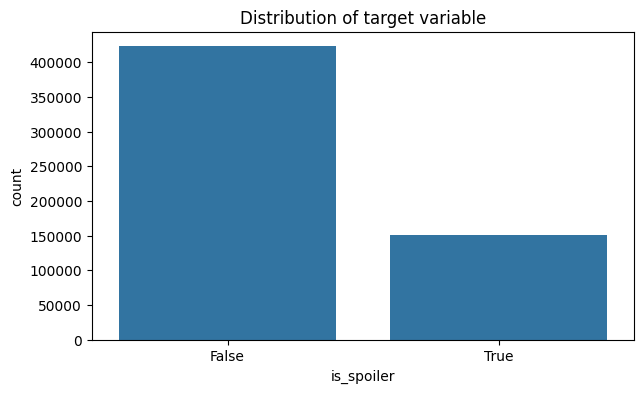

In [ ]:
plt.figure(figsize = (7, 4))
sns.countplot(data = imdb_mr_df, x = "is_spoiler")
plt.title("Distribution of target variable")
plt.show()

We can see that the total number of review_texts that contain spoilers is less than the number of review_texts that don't contain spoilers. So the dataset is slightly imbalanced. We can use the below techniques:
*  Randomly oversample the minority class.
*  Randomly undersample the majority class.



In [ ]:
imdb_md_df['rating'].nunique()

60

In [ ]:
imdb_mr_df['rating'].nunique()

10

The column 'rating' in the IMDB movie details dataframe has continuous values in the range 0 to 10 whereas the column 'rating' in the moview review dataframe has integer values from 0 to 10.

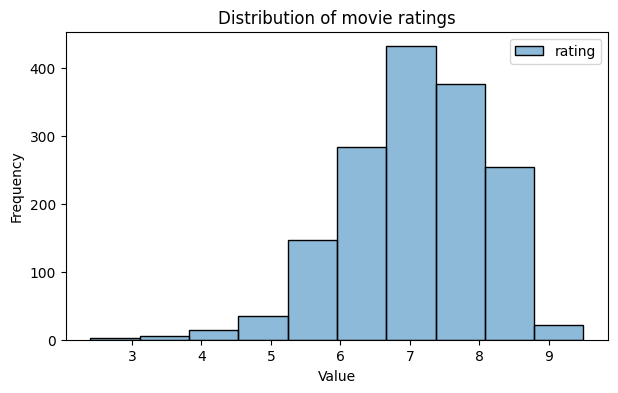

In [ ]:
# Distribution of movie ratings in IMDB Movie details dataframe
plt.figure(figsize = (7, 4))
sns.histplot(data = imdb_md_df, bins = 10, color='skyblue', edgecolor='black')
plt.title("Distribution of movie ratings")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

It can be observed that the distribution of the movie ratings follows a bell curve. The maximum number of movies have ratings of around 7-8. There are a very small number of moview with ratings below 5 and above 9.

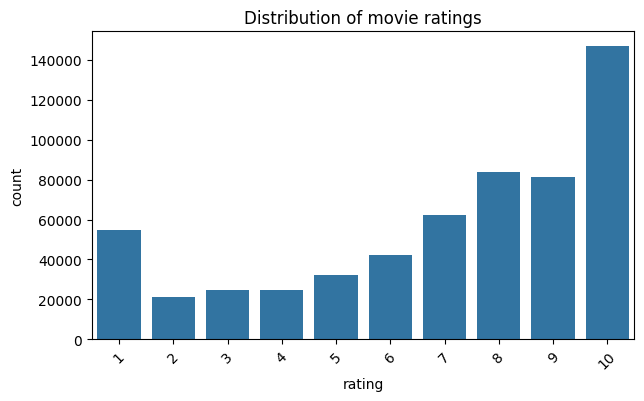

In [ ]:
# Distribution of movie ratings in IMDB Review dataframe
plt.figure(figsize = (7, 4))
sns.countplot(data = imdb_mr_df, x = "rating")
plt.title("Distribution of movie ratings")
plt.xticks(rotation=45)
plt.show()

The above graph represents the ratings given by the users for different movies. It can be observed that a lot of movies are rated 10 by the users.

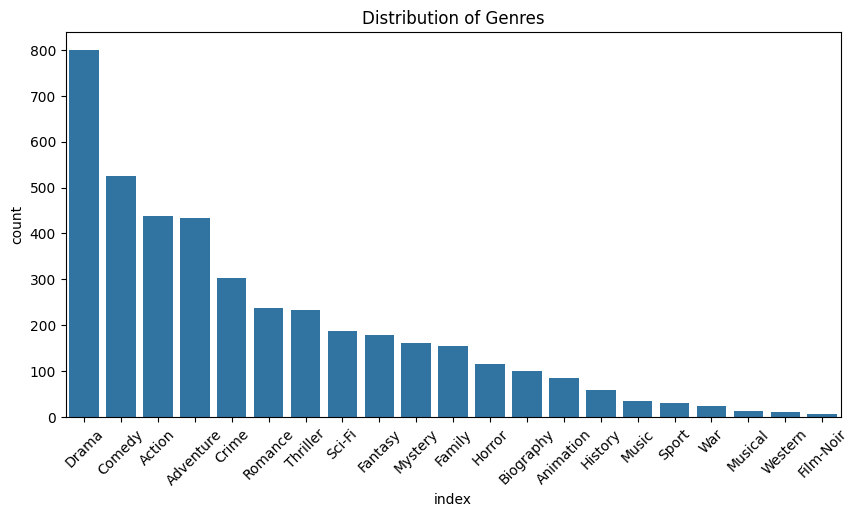

In [ ]:
# Distribution of genres
genres = []
for genre_list in imdb_md_df['genre']:
    genres.extend(genre_list)

genre_counts = pd.Series(genres).value_counts().reset_index(name='count')

# Plot the distribution of genres
plt.figure(figsize=(10, 5))
sns.barplot(data=genre_counts, x='index', y='count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

It can be observed from the above graph that the number of movies with certain genre like 'Drama', 'Comedy', 'Action', 'Adventure' are more compared to the genres like 'War', 'Musical', 'Western'and 'Film-Noir'

## Multivariate Analysis

In [ ]:
# Number of reviews for each movie
movie_review_counts = (
    imdb_mr_df.groupby('movie_id')['review_date'].count().reset_index(name='review_count')
)

# Top 10 movies with the most reviews
top_10_movies_by_reviews = movie_review_counts.sort_values(by='review_count', ascending=False).head(10)

# Print the top 10 movies with the most reviews
print("\nTop 10 movies with the most reviews:")
print(top_10_movies_by_reviews)


Top 10 movies with the most reviews:
       movie_id  review_count
1040  tt0468569          4845
360   tt0111161          4361
641   tt0167260          2729
599   tt0137523          2480
68    tt0068646          2137
355   tt0110912          1994
309   tt0108052          1151
37    tt0050083           916
1092  tt0803096           751
1551  tt5109784           751


The above list gives the list of the movies ranked based on the number of reviews it has in the movie reviews database. It can be noted that the maximum number of reviews a movie has is 4845.

In [ ]:
# Top 10 movies with the most reviews
last_10_movies_by_reviews = movie_review_counts.sort_values(by='review_count', ascending=True).head(10)

# Print the top 10 movies with the least no of reviews
print("\nTop 10 movies with the least no of reviews:")
print(last_10_movies_by_reviews)


Top 10 movies with the least no of reviews:
       movie_id  review_count
403   tt0114142             2
678   tt0201265             4
229   tt0104014             5
1568  tt6294822            11
300   tt0107719            12
1569  tt6868216            13
167   tt0101301            15
1571  tt7608534            18
1565  tt5776858            18
394   tt0113442            18


The above list shows the movies with the least number of reviews. It can be observed that certain movies have very less number of reviews. From the above two lists it can be observed that the number of reviews that a movie has ranges from 2 to 4845.

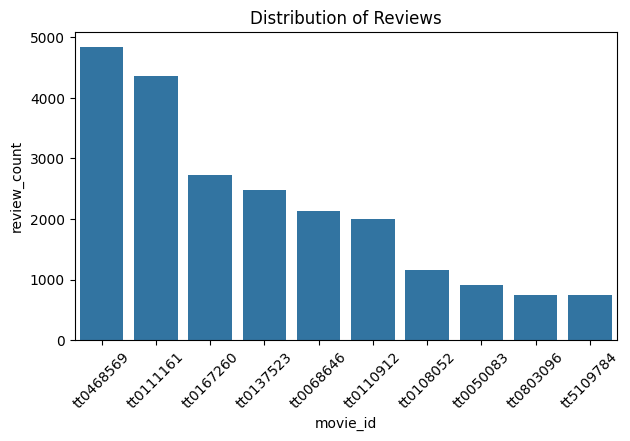

In [ ]:
plt.figure(figsize = (7, 4))
sns.barplot(data = top_10_movies_by_reviews, x = "movie_id", y = 'review_count')
plt.title("Distribution of Reviews")
plt.xticks(rotation=45)
plt.show()


Top 10 users with the most reviews:
           user_id  review_count
137515   ur2898520          1303
173155   ur4248714          1021
16299    ur0453068           806
217141  ur60028700           770
96023   ur20552756           755
190564   ur4888011           701
122132   ur2488512           681
47318    ur1234929           680
51163    ur1293485           660
17238    ur0482513           641


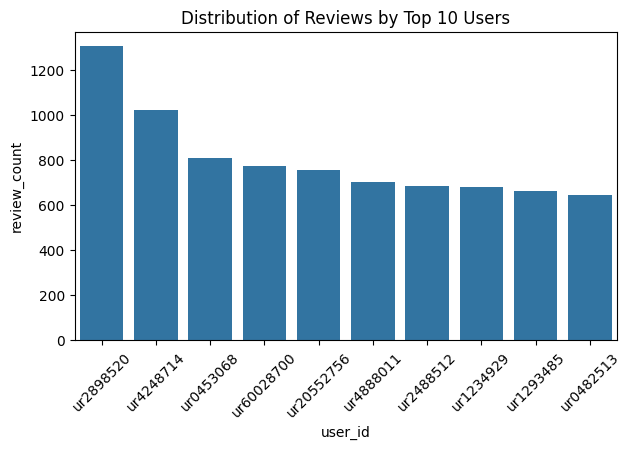

In [ ]:
# Number of reviews for each user
user_review_counts = (
    imdb_mr_df.groupby('user_id')['review_date'].count().reset_index(name='review_count')
)

# Top 10 users with the most reviews
top_10_users_by_reviews = user_review_counts.sort_values(by='review_count', ascending=False).head(10)

# Print the top 10 users with the most reviews
print("\nTop 10 users with the most reviews:")
print(top_10_users_by_reviews)

# Plot the distribution of reviews by the top 10 users
plt.figure(figsize=(7, 4))
sns.barplot(data=top_10_users_by_reviews, x="user_id", y="review_count")
plt.title("Distribution of Reviews by Top 10 Users")
plt.xticks(rotation=45)
plt.show()


The above graph shows the distribution of the top 10 users who have written the most reviews.

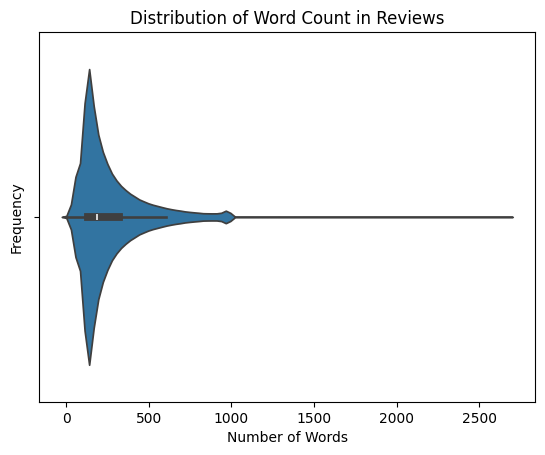

In [ ]:
# Calculate the number of words in each review
imdb_mr_df['word_count'] = imdb_mr_df['review_text'].str.split().str.len()

# Create a violin plot of the word count distribution
sns.violinplot(data=imdb_mr_df, x='word_count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count in Reviews')
plt.show()


It can be observed that most of the review_texts contains words in the range 0-500 with the majority of them around focussed around 200 words. This is good as most of the models like RoBERTa have a mazimum token length of 512. Since most of the review_texts have words less than 500, it is probable that the number of tokens after preprocessing will fall below 512.

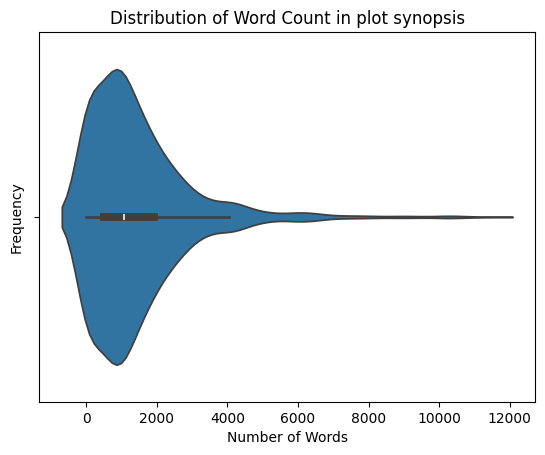

In [ ]:
# Calculate the number of words in each plot synopsis
imdb_md_df['word_count'] = imdb_md_df['plot_synopsis'].str.split().str.len()

# Create a violin plot of the word count distribution
sns.violinplot(data=imdb_md_df, x='word_count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count in plot synopsis')
plt.show()

It can be observed that the number of words in the plot_synopsis is in the range 0-4000. We can also see that the manimum number of texts(plot_synopsis) have words around 1000. This indicates that we need to do some processing like chunking before passing into the models as the maximum number of tokens in pre-trained models like RoBERTa is around 512.

Performing basic EDA like tokenization, removing stop words, lemmatization on the plot_synopis using the open source library spacy. The same will be done on the review_text as well at a later point.

In [ ]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize and lemmatize text using spaCy
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)


In [ ]:
imdb_md_df["plot_synopsis_processed"] = imdb_md_df["plot_synopsis"].apply(preprocess_text)

Word cloud on the plot synopsis

In [ ]:
plot_synopsis = ' '.join(imdb_md_df['plot_synopsis_processed'])

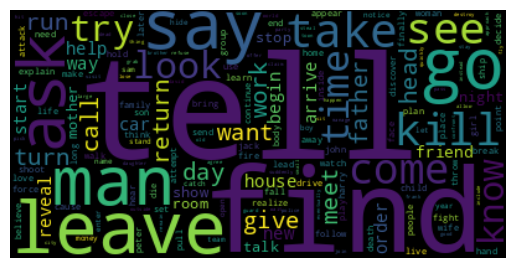

In [ ]:
wordcloud = WordCloud().generate(plot_synopsis)
# Create the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud on review texts

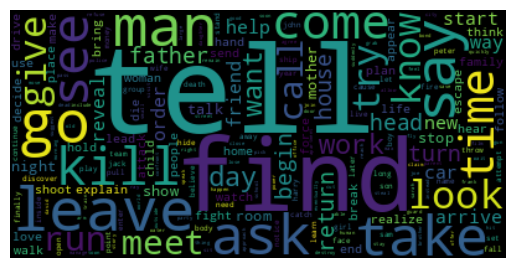

In [ ]:
review_text = ' '.join(imdb_mr_df['review_text'][:10000])
wordcloud = WordCloud().generate(plot_synopsis)
# Create the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Modelling the Data


Creating a new pandas data_frame imdb_df by doing a join using the movie_id and containing all the columns in imdb_mr_df but only the plot_synopsis column from the imdb_md_df


In [ ]:
imdb_df = pd.merge(imdb_mr_df, imdb_md_df[['movie_id', 'plot_synopsis',"plot_synopsis_processed"]], on = 'movie_id', how = 'left')

In [ ]:
imdb_df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,plot_synopsis,plot_synopsis_processed
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...


In [ ]:
imdb_df_sub = imdb_df[['is_spoiler', 'review_text', 'plot_synopsis','plot_synopsis_processed']]

In [ ]:
imdb_df_sub['label'] = imdb_df_sub['is_spoiler'].astype(int)

<ipython-input-21-1de98bac646c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df_sub['label'] = imdb_df_sub['is_spoiler'].astype(int)


In [ ]:
imdb_df_sub.head()

,is_spoiler,review_text,plot_synopsis,plot_synopsis_processed,label
0,True,"In its Oscar year, Shawshank Redemption (writt...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1
1,True,The Shawshank Redemption is without a doubt on...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1
2,True,I believe that this film is the best story eve...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1
3,True,"**Yes, there are SPOILERS here**This film has ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1
4,True,At the heart of this extraordinary movie is a ...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1


# Method 1 - Using TF IDF

In this method, I will perform the below steps:
1. First I will preprocess( tokenize the data, remove stop words, perform lemmatization) both the review_text and the plot_synopsis.
2. Then I will create the TF IDF vectors for both the review_text and the plot_synopsis.
3. Then I will find the cosine similarity between the two.
4. I will set a threshold and if the cosine similarity between the two texts is greater than the threshold then I will classify it as a spoiler otherwise I will classify it as not spoiler.

The original dataset which consists of around 570,000 rows which is taking a lot of time and compute to train. The notebook crashed several times when I used the entire dataset. So I will be usin a subset of the original data( around 10,000 rows) for now.

In [ ]:
# Use subset of the data to train
imdb_df_small = imdb_df_sub[:10000]

In [ ]:
# Preprocess review_text and plot_synopsis columns
imdb_df_small["review_text_processed"] = imdb_df_small["review_text"].apply(preprocess_text)


<ipython-input-23-4ab601c8c0dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df_small["review_text_processed"] = imdb_df_small["review_text"].apply(preprocess_text)


In [ ]:
imdb_df_small.head()

,is_spoiler,review_text,plot_synopsis,plot_synopsis_processed,label,review_text_processed
0,True,"In its Oscar year, Shawshank Redemption (writt...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,oscar year shawshank redemption write direct f...
1,True,The Shawshank Redemption is without a doubt on...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,shawshank redemption doubt brilliant movie see...
2,True,I believe that this film is the best story eve...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,believe film good story tell film tell robbin ...
3,True,"**Yes, there are SPOILERS here**This film has ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,yes spoiler film emotional impact find hard wr...
4,True,At the heart of this extraordinary movie is a ...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,heart extraordinary movie brilliant indelible ...


In [ ]:
print("Shape of the review_text_processed: ", imdb_df_small["review_text_processed"].shape)
print("Shape of the plot_synopsis_processed: ", imdb_df_small["plot_synopsis_processed"].shape)

Shape of the review_text_processed:  (10000,)
Shape of the plot_synopsis_processed:  (10000,)


In [ ]:
imdb_df_small.head()

,is_spoiler,review_text,plot_synopsis,plot_synopsis_processed,label,review_text_processed
0,True,"In its Oscar year, Shawshank Redemption (writt...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,oscar year shawshank redemption write direct f...
1,True,The Shawshank Redemption is without a doubt on...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,shawshank redemption doubt brilliant movie see...
2,True,I believe that this film is the best story eve...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,believe film good story tell film tell robbin ...
3,True,"**Yes, there are SPOILERS here**This film has ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,yes spoiler film emotional impact find hard wr...
4,True,At the heart of this extraordinary movie is a ...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,heart extraordinary movie brilliant indelible ...


In [ ]:
# Initialize TF-IDF vectorizers
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
# Fit and transform TF-IDF on plot_synopsis_processed
tfidf_plot = tfidf_vectorizer.fit_transform(imdb_df_small['plot_synopsis_processed'])


In [ ]:
tfidf_plot

<10000x2102 sparse matrix of type '<class 'numpy.float64'>'
	with 7706856 stored elements in Compressed Sparse Row format>

In [ ]:
# Fit and transform TF-IDF on review_text_processed
tfidf_review = tfidf_vectorizer.transform(imdb_df_small['review_text_processed'])


In [ ]:
# Compute cosine similarity between plot_synopsis and review_text
cosine_similarities = cosine_similarity(tfidf_plot, tfidf_review)


In [ ]:
# Add cosine similarity scores to DataFrame
imdb_df_small['cosine_similarity'] = cosine_similarities.diagonal()

<ipython-input-37-70a7b96c07cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df_small['cosine_similarity'] = cosine_similarities.diagonal()


In [ ]:
imdb_df_small.head()

,is_spoiler,review_text,plot_synopsis,plot_synopsis_processed,label,review_text_processed,cosine_similarity
0,True,"In its Oscar year, Shawshank Redemption (writt...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,oscar year shawshank redemption write direct f...,0.293690
1,True,The Shawshank Redemption is without a doubt on...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,shawshank redemption doubt brilliant movie see...,0.310298
2,True,I believe that this film is the best story eve...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,believe film good story tell film tell robbin ...,0.325598
3,True,"**Yes, there are SPOILERS here**This film has ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,yes spoiler film emotional impact find hard wr...,0.186865
4,True,At the heart of this extraordinary movie is a ...,"In 1947, Andy Dufresne (Tim Robbins), a banker...",andy dufresne tim robbin banker maine convict ...,1,heart extraordinary movie brilliant indelible ...,0.512273


In [ ]:
# Define a threshold to determine label (e.g., 0.8 for high similarity)
threshold = 0.8

# Determine labels based on similarity scores
imdb_df_small["pred_label"] = (imdb_df_small['cosine_similarity'] > threshold).astype(int)


<ipython-input-39-cc2de2735c30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df_small["pred_label"] = (imdb_df_small['cosine_similarity'] > threshold).astype(int)


## Evaluating

In [ ]:
# Compute metrics
accuracy = accuracy_score(imdb_df_small["label"], imdb_df_small["pred_label"])
precision = precision_score(imdb_df_small["label"], imdb_df_small["pred_label"])
recall = recall_score(imdb_df_small["label"], imdb_df_small["pred_label"])
f1 = f1_score(imdb_df_small["label"], imdb_df_small["pred_label"])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7214
Precision: 0.5779
Recall: 0.2782
F1 Score: 0.3756


In [ ]:
def plot_confusion_matrix(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

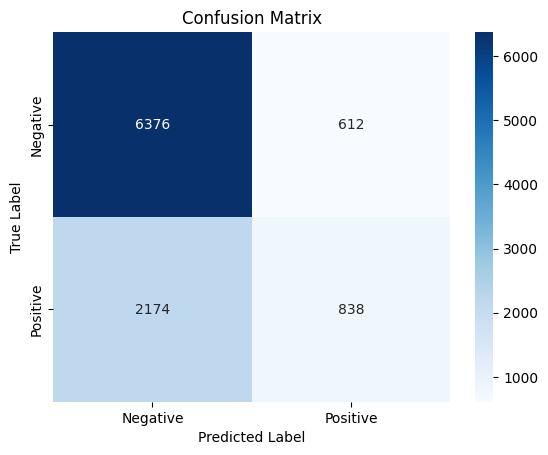

In [ ]:
# Plot confusion matrix
cm_tfidf = confusion_matrix(imdb_df_small["label"], imdb_df_small["pred_label"])
plot_confusion_matrix(cm_tfidf)

# Method 2 - Using Bi directional LSTM

In this section, we will use a bi-directional LSTM to predict the relationship between the premise(review_text) and the hypothesis(plot_synopsis)

In [ ]:
# Define tokenizer function
def tokenize(text):
    return [tok.text for tok in nlp.tokenizer(text)]


In [ ]:
# Define Fields for preprocessing
TEXT = Field(sequential=True, tokenize=tokenize, lower=True, include_lengths=True)
LABEL = Field(sequential=False, use_vocab=False, dtype=torch.float)

In [ ]:
from torchtext.data import Example
# Load data from pandas DataFrame
examples = []
for i, row in imdb_df_small[:4000].iterrows():
    premise = row['review_text']
    hypothesis = row['plot_synopsis']
    label = row['label']
    examples.append(Example.fromdict({'premise': premise, 'hypothesis': hypothesis, 'label': label}, fields={'premise': ('premise', TEXT), 'hypothesis': ('hypothesis', TEXT), 'label': ('label', LABEL)}))

# Build dataset
dataset = torchtext.data.Dataset(examples, {'premise': TEXT, 'hypothesis': TEXT, 'label': LABEL})

# Split dataset into train, validation, and test sets
train_data, valid_data, test_data = dataset.split(split_ratio=[0.7, 0.15, 0.15])

In [ ]:
# Build vocabulary based on training data
TEXT.build_vocab(train_data, vectors="glove.6B.100d")
LABEL.build_vocab(train_data)

In [ ]:
# Create data iterators
BATCH_SIZE = 8
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    sort_key=lambda x: len(x.premise) + len(x.hypothesis),
    device=device
)

In [ ]:
class BiLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 4, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, premise, hypothesis, premise_lengths, hypothesis_lengths):

      embedded_premise = self.dropout(self.embedding(premise))
      embedded_hypothesis = self.dropout(self.embedding(hypothesis))

      _, (premise_hidden, _) = self.lstm(embedded_premise)
      _, (hypothesis_hidden, _) = self.lstm(embedded_hypothesis)

      # Concatenate final hidden states of the LSTM
      combined = torch.cat((premise_hidden[-2,:,:], premise_hidden[-1,:,:], hypothesis_hidden[-2,:,:], hypothesis_hidden[-1,:,:]), dim=1)

      logits = self.fc(self.dropout(combined))

      return logits

In [ ]:
# Check GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")


Using GPU: Tesla T4


In [ ]:
print(len(TEXT.vocab))

32498


In [ ]:
# Instantiate model and optimizer
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = 1  # Binary classification (0 or 1)
DROPOUT = 0.5

model = BiLSTM(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.backends.cudnn.enabled = False

In [ ]:
model.to(device)

optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [ ]:
# Define training function
def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for batch in iterator:
        premise, premise_lengths = batch.premise
        hypothesis, hypothesis_lengths = batch.hypothesis
        labels = batch.label.unsqueeze(1)
        optimizer.zero_grad()
        logits = model(premise, hypothesis, premise_lengths, hypothesis_lengths)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

In [ ]:
# Train the model
N_EPOCHS = 5
for epoch in range(N_EPOCHS):
    train_loss = train(model, train_iterator, optimizer, criterion)
    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}')

Epoch: 1, Train Loss: 0.5441
Epoch: 2, Train Loss: 0.5407
Epoch: 3, Train Loss: 0.5304
Epoch: 4, Train Loss: 0.5318
Epoch: 5, Train Loss: 0.5243


In [ ]:
def evaluate(model, iterator, criterion):
    model.eval()  # Set model to evaluation mode
    epoch_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in iterator:
            premise, premise_lengths = batch.premise
            hypothesis, hypothesis_lengths = batch.hypothesis
            labels = batch.label.unsqueeze(1)

            # Forward pass
            logits = model(premise, hypothesis, premise_lengths, hypothesis_lengths)

            # Calculate loss
            loss = criterion(logits, labels)
            epoch_loss += loss.item()

            # Compute predictions
            predicted_labels = (torch.sigmoid(logits) > 0.5).int()
            predictions.extend(predicted_labels.cpu().numpy().flatten())
            true_labels.extend(labels.cpu().numpy().flatten())

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    plot_confusion_matrix(cm)

    return epoch_loss / len(iterator), accuracy, precision, recall, f1


In [ ]:
# Evaluating on the validation set
valid_loss, valid_acc, valid_precision, valid_recall, valid_f1 = evaluate(model, valid_iterator, criterion)

print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')
print(f'Valid Accuracy: {valid_acc:.4f}, Precision: {valid_precision:.4f}, Recall: {valid_recall:.4f}, F1: {valid_f1:.4f}')

Epoch: 5, Train Loss: 0.5243, Valid Loss: 0.5944
Valid Accuracy: 0.7433, Precision: 0.5000, Recall: 0.0130, F1: 0.0253


## Hyperparameter tuning

In [ ]:
import optuna

In [ ]:
N_EPOCHS = 2

In [ ]:
def objective(trial):
    # Define hyperparameters to search over
    hidden_dim = trial.suggest_int('hidden_dim', 64, 256)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Instantiate the model with hyperparameters
    model = BiLSTM(INPUT_DIM, EMBEDDING_DIM, hidden_dim, OUTPUT_DIM, dropout)

    # Define optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCEWithLogitsLoss()

    model.to(device)

    # Training loop
    model.train()
    for epoch in range(N_EPOCHS):
        epoch_loss = 0
        for batch in train_iterator:
            premise, premise_lengths = batch.premise
            hypothesis, hypothesis_lengths = batch.hypothesis
            labels = batch.label.unsqueeze(1)

            # Move input data to the same device as the model
            premise = premise.to(device)
            premise_lengths = premise_lengths.to(device)
            hypothesis = hypothesis.to(device)
            hypothesis_lengths = hypothesis_lengths.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            logits = model(premise, hypothesis, premise_lengths, hypothesis_lengths)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        # Print training loss for each epoch
        print(f'Epoch {epoch+1}/{N_EPOCHS}, Train Loss: {epoch_loss / len(train_iterator):.4f}')

        # Evaluation loop
        model.eval()
        with torch.no_grad():
            total_correct = 0
            total_count = 0
            for batch in valid_iterator:
                premise, premise_lengths = batch.premise
                hypothesis, hypothesis_lengths = batch.hypothesis
                labels = batch.label.unsqueeze(1)

                # Move input data to the same device as the model
                premise = premise.to(device)
                premise_lengths = premise_lengths.to(device)
                hypothesis = hypothesis.to(device)
                hypothesis_lengths = hypothesis_lengths.to(device)
                labels = labels.to(device)

                logits = model(premise, hypothesis, premise_lengths, hypothesis_lengths)
                predictions = (torch.sigmoid(logits) > 0.5).long()
                total_correct += (predictions == labels).sum().item()
                total_count += labels.size(0)

            accuracy = total_correct / total_count
            print(f'Validation Accuracy: {accuracy:.4f}')
            return accuracy

In [ ]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params

[I 2024-04-27 01:20:37,932] A new study created in memory with name: no-name-71ba5426-f11c-4cf4-a854-e9143af5e2f1
<ipython-input-122-7bdba924970c>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform('dropout', 0.1, 0.5)
<ipython-input-122-7bdba924970c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


Epoch 1/2, Train Loss: 0.5433


[I 2024-04-27 01:30:19,264] Trial 0 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 196, 'dropout': 0.33208011481358624, 'learning_rate': 0.001735688105618328}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5431


[I 2024-04-27 01:39:52,520] Trial 1 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 128, 'dropout': 0.10996584910956608, 'learning_rate': 0.0005745073427499356}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5856


[I 2024-04-27 01:49:23,211] Trial 2 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 235, 'dropout': 0.27080583430418304, 'learning_rate': 0.005400338272571117}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.6178


[I 2024-04-27 01:58:57,150] Trial 3 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 72, 'dropout': 0.466924290497727, 'learning_rate': 2.8568565526101854e-05}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5419


[I 2024-04-27 02:08:34,818] Trial 4 finished with value: 0.7166666666666667 and parameters: {'hidden_dim': 137, 'dropout': 0.2367350451830913, 'learning_rate': 0.0014669993829623986}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7167
Epoch 1/2, Train Loss: 0.5812


[I 2024-04-27 02:18:09,801] Trial 5 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 251, 'dropout': 0.262898188610699, 'learning_rate': 1.4244225289724447e-05}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5440


[I 2024-04-27 02:27:49,736] Trial 6 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 179, 'dropout': 0.2753933297393264, 'learning_rate': 0.0014175463460864744}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5423


[I 2024-04-27 02:37:29,355] Trial 7 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 244, 'dropout': 0.41323554600375145, 'learning_rate': 0.00016100148531413943}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5505


[I 2024-04-27 02:47:03,729] Trial 8 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 233, 'dropout': 0.32503546413911155, 'learning_rate': 6.256328554548627e-05}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433
Epoch 1/2, Train Loss: 0.5411


[I 2024-04-27 02:56:43,388] Trial 9 finished with value: 0.7433333333333333 and parameters: {'hidden_dim': 244, 'dropout': 0.341087758407853, 'learning_rate': 0.0004901255226473672}. Best is trial 0 with value: 0.7433333333333333.


Validation Accuracy: 0.7433


In [ ]:
print(best_params)

{'hidden_dim': 196, 'dropout': 0.33208011481358624, 'learning_rate': 0.001735688105618328}


## Evaluating

Epoch: 1, Train Loss: 0.6928
Epoch: 2, Train Loss: 0.6914


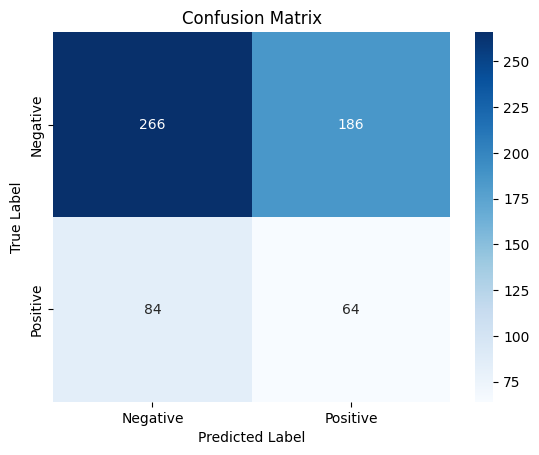

Test Loss: 0.6918
Test Accuracy: 0.5500
Precision: 0.2560
Recall: 0.4324
F1 score: 0.3216


In [ ]:
# Best parameters after hyper parameter tuning are:
# {'hidden_dim': 196, 'dropout': 0.33208011481358624, 'learning_rate': 0.001735688105618328}
HIDDEN_DIM = 196
DROPOUT = 0.33
model = BiLSTM(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)

# Train the model
N_EPOCHS = 2
model.to(device)
for epoch in range(N_EPOCHS):
    train_loss = train(model, train_iterator, optimizer, criterion)
    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}')

test_loss, test_acc, test_precision, test_recall, test_f1 = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}\nPrecision: {test_precision:.4f}\nRecall: {test_recall:.4f}\nF1 score: {test_f1:.4f}')

# Method 3 - Using GRU

In [ ]:
# Define GRU model
class GRU(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.sigmoid = nn.Sigmoid()

    def forward(self, premise, hypothesis):
        embedded_premise = self.embedding(premise)
        embedded_hypothesis = self.embedding(hypothesis)

        output_premise, _ = self.gru(embedded_premise)
        output_hypothesis, _ = self.gru(embedded_hypothesis)

        output_premise = output_premise[-1]
        output_hypothesis = output_hypothesis[-1]

        combined_output = torch.cat((output_premise, output_hypothesis), dim=1)
        output = self.dropout(combined_output)
        return self.sigmoid(self.fc(output))


In [ ]:
# Define model parameters
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = 1
DROPOUT = 0.3

In [ ]:
# Instantiate model
model = GRU(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT).to(device)

# Define loss and optimizer
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

In [ ]:
# Define functions to compute metrics
def compute_metrics(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return accuracy, precision, recall, f1

In [ ]:
# Define training loop
def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    predictions_all = []
    labels_all = []
    for batch in iterator:
        optimizer.zero_grad()

        premise, premise_lengths = batch.premise
        hypothesis, hypothesis_lengths = batch.hypothesis

        predictions = model(premise, hypothesis).squeeze(1)
        loss = criterion(predictions, batch.label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        # Append predictions and labels for computing metrics
        predictions_all.extend(torch.round(predictions).tolist())
        labels_all.extend(batch.label.tolist())

    accuracy, precision, recall, f1 = compute_metrics(predictions_all, labels_all)
    return epoch_loss / len(iterator), accuracy, precision, recall, f1


In [ ]:
# Define evaluation loop
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    predictions_all = []
    labels_all = []
    with torch.no_grad():
        for batch in iterator:
            premise, premise_lengths = batch.premise
            hypothesis, hypothesis_lengths = batch.hypothesis

            predictions = model(premise, hypothesis).squeeze(1)
            loss = criterion(predictions, batch.label)
            epoch_loss += loss.item()

            # Append predictions and labels for computing metrics
            predictions_all.extend(torch.round(predictions).tolist())
            labels_all.extend(batch.label.tolist())

    accuracy, precision, recall, f1 = compute_metrics(predictions_all, labels_all)
    # Compute confusion matrix
    cm = confusion_matrix(predictions_all, labels_all)
    plot_confusion_matrix(cm)

    return epoch_loss / len(iterator), accuracy, precision, recall, f1

In [ ]:
# Train the model
N_EPOCHS = 10
model.to(device)
for epoch in range(N_EPOCHS):
    train_loss, train_acc, train_precision, train_recall, train_f1 = train(model, train_iterator, optimizer, criterion)
    # valid_loss, valid_acc, valid_precision, valid_recall, valid_f1 = evaluate(model, valid_iterator, criterion)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, , '
          f'Train Acc: {train_acc:.3f},  '
          f'Train Precision: {train_precision:.3f},  '
          f'Train Recall: {train_recall:.3f},  '
          f'Train F1: {train_f1:.3f},')


Epoch: 01, Train Loss: 0.125, , Train Acc: 0.960,  Train Precision: 0.923,  Train Recall: 0.904,  Train F1: 0.913,
Epoch: 02, Train Loss: 0.097, , Train Acc: 0.969,  Train Precision: 0.940,  Train Recall: 0.924,  Train F1: 0.932,
Epoch: 03, Train Loss: 0.084, , Train Acc: 0.972,  Train Precision: 0.945,  Train Recall: 0.932,  Train F1: 0.939,
Epoch: 04, Train Loss: 0.093, , Train Acc: 0.965,  Train Precision: 0.932,  Train Recall: 0.914,  Train F1: 0.923,
Epoch: 05, Train Loss: 0.079, , Train Acc: 0.967,  Train Precision: 0.940,  Train Recall: 0.917,  Train F1: 0.928,
Epoch: 06, Train Loss: 0.065, , Train Acc: 0.975,  Train Precision: 0.952,  Train Recall: 0.941,  Train F1: 0.946,
Epoch: 07, Train Loss: 0.056, , Train Acc: 0.976,  Train Precision: 0.952,  Train Recall: 0.943,  Train F1: 0.947,
Epoch: 08, Train Loss: 0.052, , Train Acc: 0.974,  Train Precision: 0.954,  Train Recall: 0.932,  Train F1: 0.943,
Epoch: 09, Train Loss: 0.050, , Train Acc: 0.975,  Train Precision: 0.951,  Trai

## Hyperparameter tuning

In [ ]:
input_dim = len(TEXT.vocab)
embedding_dim = 100
hidden_dim = 128
output_dim = 1
dropout = 0.3
num_epochs = 5

In [ ]:
# Define your objective function
def objective(trial):
    # Sample hyperparameters
    dropout = trial.suggest_uniform('dropout', 0.1, 0.5)
    hidden_dim = trial.suggest_int('hidden_dim', 64, 256)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Instantiate the model with sampled hyperparameters
    model = GRU(input_dim, embedding_dim, hidden_dim, output_dim, dropout)
    model.to(device)

    # Define optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    num_epochs = 3  # Define the number of epochs for training
    # Train the model
    for epoch in range(num_epochs):
        # Training loop
        train_loss, train_acc, _, _, _ = train(model, train_iterator, optimizer, criterion)

    # Evaluate the model
    val_loss, val_acc, _, _, _ = evaluate(model, valid_iterator, criterion)

    return val_acc

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)


In [ ]:
# Train the model using the best hyperparameters
best_model = GRU(input_dim, embedding_dim, best_params['hidden_dim'], output_dim, best_params['dropout'])
best_model.to(device)
optimizer = torch.optim.Adam(best_model.parameters(), lr=best_params['learning_rate'])
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    # Training loop
    train_loss, train_acc = train(best_model, train_iterator, optimizer, criterion)

## Evaluating

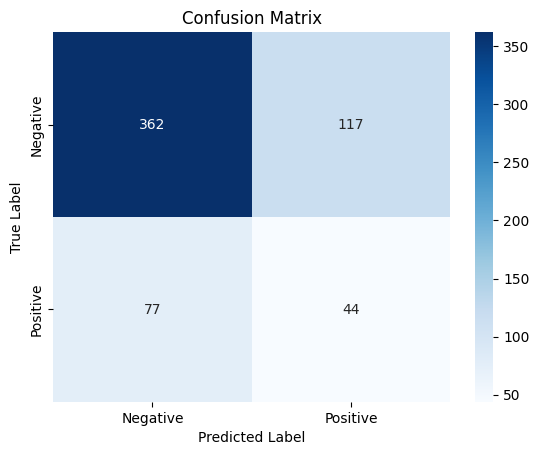

Test Loss: 1.352
Test Acc: 0.677
Test Precision: 0.364
Test Recall: 0.273
Test F1: 0.312


In [ ]:
# Evaluate the model on test set
test_loss, test_acc, test_precision, test_recall, test_f1 = evaluate(best_model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f}\nTest Acc: {test_acc:.3f}\nTest Precision: {test_precision:.3f}\nTest Recall: {test_recall:.3f}\nTest F1: {test_f1:.3f}')

# Method 4. Using Roberta - variant of BERT


In this section, I will be using the pre-trained model, Roberta which is based on Transformer neural networks. I will finetune it on the IMDB movie data and use the fine tuned model to  predict the relationship between the premise(review_text) and the hypothesis(plot_synopsis)

In [ ]:
# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The code below leverages the premise-hypothesis concept by tokenizing and processing pairs of premise(review_text) and hypothesis(plot_synopsis) from the IMDB dataset. These tokenized sequences are then used as input to the RoBERTa model for training and evaluation in the NLI task. The model learns to predict the relationship between the premise and hypothesis based on the given training examples.

In [ ]:
# Preprocess function for tokenization
# Here premise is the review_text and hypothesis is the plot_synopsis
def preprocess_function(examples):
    return tokenizer(examples['review_text'], examples['plot_synopsis'], padding="max_length", truncation=True)


In [ ]:
# Convert pandas DataFrame to Dataset
#dataset = Dataset.from_pandas(imdb_df_sub[:10000])

In [ ]:
train_df, test_df = train_test_split(imdb_df_sub[:10000], test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.1)

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Preprocess the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/7200 [00:00<?, ? examples/s]

Streaming output truncated to the last 5000 lines.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [ ]:
training_args = TrainingArguments(
    output_dir="./nli_model",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    evaluation_strategy="steps",
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False
)


In [ ]:
# Define compute metrics function for evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average="weighted")
    recall = recall_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall":recall}

In [ ]:
# Set CUDA_VISIBLE_DEVICES to specify which GPU to use
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Use the first GPU (index 0)


In [ ]:
# Check GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")


Using GPU: Tesla T4


In [ ]:
# Trainer for model training
accelerator = Accelerator()
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)
trainer = accelerator.prepare(trainer)


In [ ]:
# Train the model
trainer.train()


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.660500,0.618180,0.717500,0.599483,0.514806,0.717500
200,0.614800,0.574824,0.702500,0.703667,0.704912,0.702500
300,0.579700,0.564763,0.702500,0.703667,0.704912,0.702500
400,0.589700,0.577411,0.701250,0.701450,0.701651,0.701250
500,0.592700,0.615443,0.717500,0.599483,0.514806,0.717500
600,0.592600,0.550504,0.717500,0.599483,0.514806,0.717500
700,0.590200,0.562443,0.717500,0.599483,0.514806,0.717500
800,0.593000,0.569555,0.717500,0.599483,0.514806,0.717500
900,0.586100,0.561579,0.717500,0.599483,0.514806,0.717500
1000,0.598100,0.561252,0.717500,0.599483,0.514806,0.717500


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

TrainOutput(global_step=1800, training_loss=0.5936502880520291, metrics={'train_runtime': 1997.8, 'train_samples_per_second': 7.208, 'train_steps_per_second': 0.901, 'total_flos': 3788799197184000.0, 'train_loss': 0.5936502880520291, 'epoch': 2.0})

In [ ]:
preds_output = trainer.predict(val_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds_output.metrics

{'test_loss': 0.6154433488845825,
 'test_accuracy': 0.7175,
 'test_f1': 0.5994832605531295,
 'test_precision': 0.51480625,
 'test_recall': 0.7175,
 'test_runtime': 27.8226,
 'test_samples_per_second': 28.754,
 'test_steps_per_second': 1.797}

## Hyperparameter tuning

In [ ]:
def objective(trial):
    # Define hyperparameters to optimize
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 3)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./nli_model",
        per_device_train_batch_size=per_device_train_batch_size,
        num_train_epochs=num_train_epochs,
        learning_rate=learning_rate,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_steps=500,
        save_total_limit=2,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        push_to_hub=False
    )

    # Create Trainer object
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate on validation set
    result = trainer.evaluate()

    # Print the accuracy for each trial
    print(f"Trial {trial.number}: Validation Accuracy {result['eval_accuracy']:.4f}")

    # Return the metric to optimize
    return result["eval_accuracy"]


In [ ]:
# Set up Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2024-04-28 23:48:54,086] A new study created in memory with name: no-name-a8d1eb6d-1c45-4751-9274-38817dca9906


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.619102,0.690000,0.563432,0.476100,0.690000
2,0.601800,0.621615,0.690000,0.563432,0.476100,0.690000
3,0.609700,0.620151,0.690000,0.563432,0.476100,0.690000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-04-29 00:27:55,845] Trial 0 finished with value: 0.69 and parameters: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'learning_rate': 2.897670893484226e-05}. Best is trial 0 with value: 0.69.


Trial 0: Validation Accuracy 0.6900


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.610600,0.620474,0.690000,0.563432,0.476100,0.690000
2,0.619400,0.626814,0.690000,0.563432,0.476100,0.690000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-04-29 00:56:33,698] Trial 1 finished with value: 0.69 and parameters: {'num_train_epochs': 2, 'per_device_train_batch_size': 4, 'learning_rate': 0.00013508910953854536}. Best is trial 0 with value: 0.69.


Trial 1: Validation Accuracy 0.6900


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.598600,0.619139,0.690000,0.563432,0.476100,0.690000
2,0.617600,0.623754,0.690000,0.563432,0.476100,0.690000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-04-29 01:25:21,391] Trial 2 finished with value: 0.69 and parameters: {'num_train_epochs': 2, 'per_device_train_batch_size': 4, 'learning_rate': 5.399891208180254e-05}. Best is trial 0 with value: 0.69.


Trial 2: Validation Accuracy 0.6900
Best hyperparameters: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'learning_rate': 2.897670893484226e-05}


In [ ]:
# Train the final model with the best hyperparameters
final_training_args = TrainingArguments(
    output_dir="./nli_model",
    per_device_train_batch_size=best_params["per_device_train_batch_size"],
    num_train_epochs=best_params["num_train_epochs"],
    learning_rate=best_params["learning_rate"],
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False
)

In [ ]:
# Create Trainer object for final training
final_trainer = Trainer(
    model=model,
    args=final_training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the final model
final_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.620632,0.690000,0.563432,0.476100,0.690000
2,0.605700,0.619911,0.690000,0.563432,0.476100,0.690000
3,0.608200,0.619263,0.690000,0.563432,0.476100,0.690000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1350, training_loss=0.6079644888418693, metrics={'train_runtime': 2311.8047, 'train_samples_per_second': 9.343, 'train_steps_per_second': 0.584, 'total_flos': 5683198795776000.0, 'train_loss': 0.6079644888418693, 'epoch': 3.0})

## Evaluating

Evaluating the original model on the test dataset.

In [ ]:
preds_output = trainer.predict(test_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds_output.metrics

{'test_loss': 0.6173211932182312,
 'test_accuracy': 0.708,
 'test_f1': 0.58696018735363,
 'test_precision': 0.5012639999999999,
 'test_recall': 0.708,
 'test_runtime': 68.9721,
 'test_samples_per_second': 28.997,
 'test_steps_per_second': 1.812}

Evaluating the model obtained after hyper parameter tuning.

In [ ]:
final_output = final_trainer.predict(test_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
final_output.metrics

{'test_loss': 0.6236979961395264,
 'test_accuracy': 0.6855,
 'test_f1': 0.5575915158706615,
 'test_precision': 0.46991025000000003,
 'test_recall': 0.6855,
 'test_runtime': 64.5848,
 'test_samples_per_second': 30.967,
 'test_steps_per_second': 3.871}

The original model gave better results than the one after hyperparameter tuning. So will be using that model for comparision for now. Reasons for the tuned model for not giving good results and tuning the current model further to get better results will be for future work.

# Results Analysis

Below are the results of all the models on the test data:<br>

**Model 1: Using TF-IDF** <br>
Accuracy: 0.7214 <br>
Precision: 0.5779 <br>
Recall: 0.2782 <br>
F1 Score: 0.3756 <br><br>

**Model 2: Using Bidirectional LSTM** <br>
Accuracy: 0.5500 <br>
Precision: 0.2560 <br>
Recall: 0.4324 <br>
F1 score: 0.3216 <br><br>

**Model 3: Using GRU** <br>
Test Accuracy: 0.677 <br>
Test Precision: 0.364 <br>
Test Recall: 0.273 <br>
Test F1: 0.312 <br><br>

<b>Model 4: Using Fine tuned Roberta </b> <br>

 Accuracy: 0.708 <br>
 F1 score: 0.58696018735363 <br>
 Precision: 0.5012639999999999 <br>
 Recall: 0.708 <br>

 It can be observed that the fine tuned Roberta model gave better results among all the models used. The performance of all the models can be increased using a larger dataset for training. But since it was taking too much time and compute power I had to use a subset of the dataset. Also chunking the plot synopsis might likely get better results as the text is long.


# Future Work

A lot of work can be still done on this project. Due to the limited time and compute I could not explore the full possibilities. Below are some of the areas of improvement:

1. Due to the limitations on training time, I used only a subset of the original dataset. I tried utilizing the full dataset but the notebook crashed several times due to running out of RAM(even though I used the pro version). The models could be trained on larger datasets provided the time and resources.Using more data will definitely give better results as the models will be trained on more data.

2. Using a large number of epochs. Due to limited time I had to use less number of epochs to train the models. Again increasing the number of epochs will help train the model better and give better results during evaluation.

3. Most of the plot synopsis consists of words in the range 1000 to 2000. Most of the models don't perform well when we use such large text as input since the max token length is usually 512 or 1024. One approach would be to break the text into chunks and process. There could be different approaches we can use to process the chunks. One way could  be to compare each chunk with the review text and take the average of all the results.

4. The same approach could be applied to the review texts as well though most of the review texts are below 500 words in length, they could be split into chunks and processed and then the results could be compared to draw insights.

5. Experimenting with different number of LSTM layers, changing the dimensions of the layers, trying a combination of LSTM, GRU layers etc.

6. In this notebook, I fine tuned Roberta by retraining all the parameters since this is the only way I know as of now. It took a lot of time to do this. Using other fine tuning techniques like LoRA and QLoRA which are more efficient can be utilized in future to reduce the time and compute significantly.